# line chart
# word cloud

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('merged_data_withkeywords.csv')

In [12]:
df.head()

,title,publicationName,abstract,keywords,subjectArea,publication_date,combined,processed,Top_Three_Keywords,One_keyword
0,Effects of iron content on the microstructure ...,Materials Chemistry and Physics,© 2018The microstructure and corrosion behavio...,"EIS,Microstructure,Pitting corrosion,Polarizat...","MATE,PHYS",01/10/2018,Effects of iron content on the microstructure ...,effects iron content microstructure corrosion ...,"alloys, corrosion, exhibit",alloys
1,The critical factors of research and innovatio...,International Journal of Trade and Global Markets,Copyright © 2018 Inderscience Enterprises Ltd....,"Critical factors,Innovation creation,Public un...","BUSI,ECON",01/01/2018,The critical factors of research and innovatio...,critical factors research innovation creation ...,"universities, creation, innovation",universities
2,Is the occiput-wall distance valid and reliabl...,Musculoskeletal Science and Practice,© 2018Background: Hyperkyphosis may be frequen...,"Cobb angle,Dowager's hump,Round back,Spine",HEAL,01/12/2018,Is the occiput-wall distance valid and reliabl...,occiput-wall distance valid reliable determine...,"hyperkyphosis, owd, thoracic",hyperkyphosis
3,Comparison of soil composition between farmlan...,Eurasian Journal of Analytical Chemistry,© 2018 Society for Innovative Research. All ri...,"Agriculture land management,Conserved area,Soi...","PHAR,CHEM",01/01/2018,Comparison of soil composition between farmlan...,comparison soil composition farmlands conserve...,"farmlands, soils, conserved",farmlands
4,The impact of wire caliber on ERCP outcomes: a...,Gastrointestinal Endoscopy,© 2018Background and Aims: Wire-guided biliary...,NaN,MEDI,01/06/2018,The impact of wire caliber on ERCP outcomes: a...,impact wire caliber ercp outcomes multicenter ...,"inch, cannulation, wire",inch


In [13]:
df['Top_Three_Keywords']

0                alloys, corrosion, exhibit
1        universities, creation, innovation
2              hyperkyphosis, owd, thoracic
3               farmlands, soils, conserved
4                   inch, cannulation, wire
                        ...                
22601          som, trajectory, intelligent
22602      airworthiness, propulsion, evtol
22603                aeroengine, lstm, path
22604       aerodynamics, propulsion, evtol
22605            200kw, aviation, precision
Name: Top_Three_Keywords, Length: 22606, dtype: object

In [14]:
df['Top_Three_Keywords'].value_counts()

Top_Three_Keywords
preface, 00, 000                         26
introduction, 00, 000                    14
foreword, 00, 000                        11
chair, message, general                   8
editorial, 00, 000                        6
                                         ..
personnel, room, operating                1
liposuction, dysmorphic, affiliations     1
cost, production, material                1
dialysis, perspective, global             1
200kw, aviation, precision                1
Name: count, Length: 22409, dtype: int64

cov, sars                  
higgs, boson             
covid, 19   

In [15]:
keyword_count = {}
for k in df['Top_Three_Keywords']:
    keywords = k.split(', ')
    #keyword = ' '.join(keywords)
    for keyword in keywords:
        if keyword in keyword_count:
            keyword_count[keyword] += 1
        else:
            keyword_count[keyword] = 1


I have keyword counted dict ex) {'proton': 86,
 'covid': 79,
 'hiv': 74,
 'boson': 67,
 'higgs': 59,
 'co2': 58,
 'waste': 52,
 'liver': 49,
 'health': 49,
 'species': 47,
 'cov': 45, 

In [16]:
keyword_count = dict(sorted(keyword_count.items(), key=lambda item: item[1], reverse=True))
keyword_count

{'00': 148,
 'proton': 143,
 'covid': 130,
 'hiv': 101,
 'co2': 95,
 '000': 94,
 'boson': 89,
 'cancer': 86,
 'oil': 82,
 'species': 81,
 'students': 75,
 'cov': 75,
 'higgs': 72,
 'health': 69,
 'liver': 68,
 'patients': 67,
 '19': 65,
 'waste': 63,
 'adsorption': 60,
 'children': 60,
 'films': 57,
 'learning': 56,
 'bone': 55,
 'catalyst': 54,
 'rice': 54,
 'aki': 52,
 'dogs': 51,
 'pain': 50,
 'tio2': 50,
 'drug': 49,
 'vaccine': 49,
 'depression': 48,
 'soil': 48,
 'quark': 47,
 'food': 47,
 'dengue': 47,
 'il': 46,
 'sars': 46,
 'cell': 45,
 'women': 45,
 'catalysts': 45,
 'energy': 45,
 'innovation': 44,
 'top': 43,
 'extraction': 43,
 'groundwater': 43,
 'sleep': 43,
 'risk': 42,
 'education': 42,
 'care': 41,
 'oral': 41,
 'kidney': 41,
 'concrete': 41,
 'composites': 40,
 'skin': 40,
 'pla': 40,
 'cats': 40,
 'power': 39,
 'breast': 39,
 'biodiesel': 39,
 'elderly': 38,
 'sensor': 38,
 'older': 38,
 'biomass': 38,
 'nursing': 38,
 'production': 37,
 'hpv': 37,
 'schizophrenia'

In [17]:
def split_two(x):
    list = x.split(', ')
    return list

In [18]:
'01/06/2018'
'2023-06'

'2023-06'

In [19]:
def set_date(x):
    m = x.split('/')[1]
    y = x.split('/')[2]
    return y+'-'+m

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert publication_date to datetime format
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%d/%m/%Y')

# Expand Top_Two_Keywords into individual rows
keywords_df = df.assign(Top_Two_Keywords=df['Top_Two_Keywords'].str.split(', ')).explode('Top_Two_Keywords')

# Extract year for aggregation
keywords_df['year'] = keywords_df['publication_date'].dt.year

# Count total occurrences of each keyword and filter top N
keyword_counts = keywords_df['Top_Two_Keywords'].value_counts()
top_keywords = keyword_counts.head(10).index  # Adjust number of keywords as needed
filtered_data = keywords_df[keywords_df['Top_Two_Keywords'].isin(top_keywords)]

# Group by year and keyword
trend_data = filtered_data.groupby(['year', 'Top_Two_Keywords']).size().unstack(fill_value=0)

# Plot the trends
plt.figure(figsize=(12, 6))
for keyword in trend_data.columns:
    plt.plot(trend_data.index, trend_data[keyword], label=keyword)

plt.title("Top Keyword Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.legend(title="Keywords", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Final Line Chart

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data_chula2.csv')

# Convert publication_date to datetime format
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%d/%m/%Y')

# Expand Top_Two_Keywords into individual rows
keywords_df = df.assign(Top_Two_Keywords=df['Top_Two_Keywords'].str.split(', ')).explode('Top_Two_Keywords')

# Extract year for aggregation
keywords_df['year'] = keywords_df['publication_date'].dt.year

# Streamlit Title
st.title("Keyword Trends Over Time")

# Sidebar: User Input for Number of Keywords
st.sidebar.header("Options")
num_keywords = st.sidebar.slider("Number of Keywords to Display", 5, 20, 10)

# Count total occurrences of each keyword
keyword_counts = keywords_df['Top_Two_Keywords'].value_counts()

# Filter top N keywords based on user input
top_keywords = keyword_counts.head(num_keywords).index
filtered_data = keywords_df[keywords_df['Top_Two_Keywords'].isin(top_keywords)]

# Group by year and keyword
trend_data = filtered_data.groupby(['year', 'Top_Two_Keywords']).size().unstack(fill_value=0)

# Plot the trends
fig, ax = plt.subplots(figsize=(12, 6))
for keyword in trend_data.columns:
    ax.plot(trend_data.index, trend_data[keyword], label=keyword)

ax.set_title("Top Keyword Trends Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Frequency")
ax.legend(title="Keywords", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Display plot in Streamlit
st.pyplot(fig)

# Optional: Display filtered data
if st.sidebar.checkbox("Show Data Table"):
    st.dataframe(filtered_data)


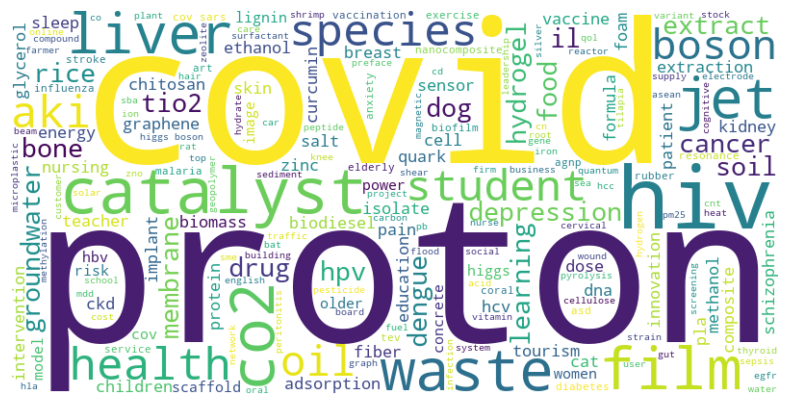

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
#data = {'Top_Two_Keywords': ['AI, Machine Learning', 'Deep Learning, AI', 'Neural Networks, AI']}
#df = pd.DataFrame(data)

# Combine all keywords into one string
all_keywords = ', '.join(df['Top_Two_Keywords']).replace(", ", " ")

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

# Display WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('merged_data_withkeywords.csv')

# Convert publication_date to datetime format
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%d/%m/%Y')

# Split subjectArea into multiple rows
subject_df = df.assign(subjectArea=df['subjectArea'].str.split(',')).explode('subjectArea')

# Expand Top_Two_Keywords into individual rows
keywords_df = subject_df.assign(Top_Two_Keywords=subject_df['Top_Two_Keywords'].str.split(', ')).explode('Top_Two_Keywords')

# Extract year for aggregation
keywords_df['year'] = keywords_df['publication_date'].dt.year

# Streamlit sidebar for subject area selection
st.sidebar.header("Filters")
available_subject_areas = sorted(keywords_df['subjectArea'].unique())
selected_subject_area = st.sidebar.selectbox("Select Subject Area", available_subject_areas)

# Filter data by selected subject area
filtered_subject_data = keywords_df[keywords_df['subjectArea'] == selected_subject_area]

if filtered_subject_data.empty:
    st.warning(f"No data found for subject area: {selected_subject_area}")
else:
    # Count total occurrences of each keyword and filter top 10
    keyword_counts = filtered_subject_data['Top_Two_Keywords'].value_counts()
    top_keywords = keyword_counts.head(10).index
    filtered_data = filtered_subject_data[filtered_subject_data['Top_Two_Keywords'].isin(top_keywords)]

    # Group by year and keyword
    trend_data = filtered_data.groupby(['year', 'Top_Two_Keywords']).size().unstack(fill_value=0)

    # Plot the trends
    fig, ax = plt.subplots(figsize=(12, 6))
    for keyword in trend_data.columns:
        ax.plot(trend_data.index, trend_data[keyword], label=keyword)

    ax.set_title(f"Top Keyword Trends Over Time in {selected_subject_area}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Frequency")
    ax.legend(title="Keywords", loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()

    # Display the plot in Streamlit
    st.pyplot(fig)


In [3]:
import pandas as pd
df2 = pd.read_csv('merged_data_withkeywords.csv')
df2.columns

Index(['title', 'publicationName', 'abstract', 'keywords', 'subjectArea',
       'publication_date', 'combined', 'processed', 'Top_Three_Keywords',
       'One_keyword'],
      dtype='object')

In [6]:
df2[['subjectArea','publication_date','Top_Three_Keywords','One_keyword']]


,subjectArea,publication_date,Top_Three_Keywords,One_keyword
0,"MATE,PHYS",01/10/2018,"alloys, corrosion, exhibit",alloys
1,"BUSI,ECON",01/01/2018,"universities, creation, innovation",universities
2,HEAL,01/12/2018,"hyperkyphosis, owd, thoracic",hyperkyphosis
3,"PHAR,CHEM",01/01/2018,"farmlands, soils, conserved",farmlands
4,MEDI,01/06/2018,"inch, cannulation, wire",inch
...,...,...,...,...
22601,ENGI,31/12/2023,"som, trajectory, intelligent",som
22602,"ENGI,MEDI",31/12/2023,"airworthiness, propulsion, evtol",airworthiness
22603,ENGI,31/12/2023,"aeroengine, lstm, path",aeroengine
22604,ENGI,31/12/2023,"aerodynamics, propulsion, evtol",aerodynamics


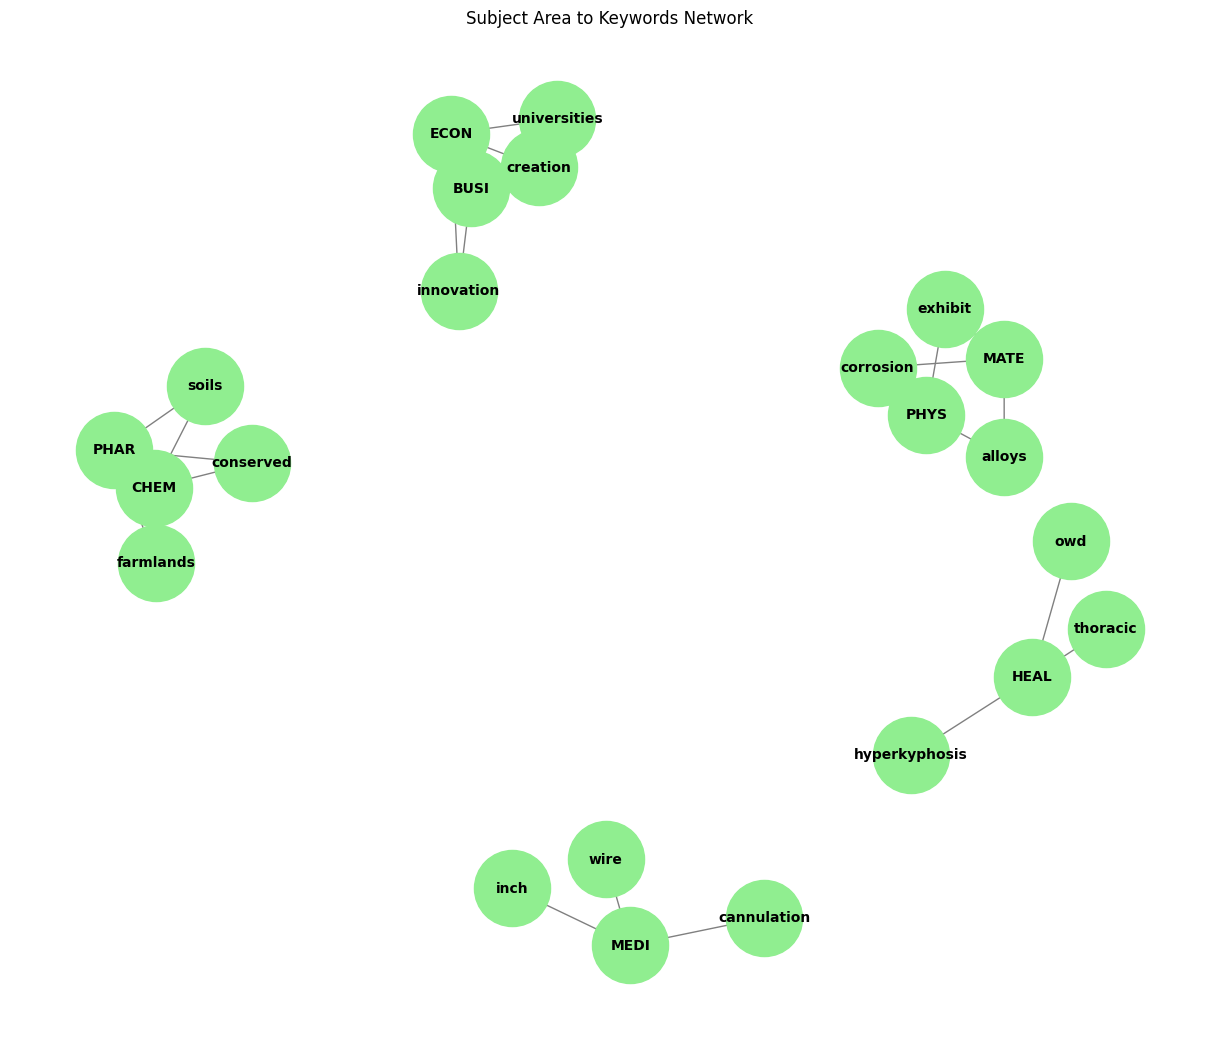

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Example data (replace with your actual dataset)
data = {
    'subjectArea': ['MATE,PHYS', 'BUSI,ECON', 'HEAL', 'PHAR,CHEM', 'MEDI'],
    'publication_date': ['01/10/2018', '01/01/2018', '01/12/2018', '01/01/2018', '01/06/2018'],
    'Top_Three_Keywords': [['alloys', 'corrosion', 'exhibit'], ['universities', 'creation', 'innovation'], 
                           ['hyperkyphosis', 'owd', 'thoracic'], ['farmlands', 'soils', 'conserved'], ['inch', 'cannulation', 'wire']],
    'One_keyword': ['alloys', 'universities', 'hyperkyphosis', 'farmlands', 'inch']
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Step 1: Create an empty graph
G = nx.Graph()

# Step 2: Loop through the rows and add edges between subject areas and keywords
for _, row in df.iterrows():
    subject_areas = row['subjectArea'].split(',')  # Split multiple subject areas
    keywords = row['Top_Three_Keywords'] + [row['One_keyword']]  # Combine keywords from both columns

    # Add edges between each subject area and its associated keywords
    for subject in subject_areas:
        for keyword in keywords:
            G.add_edge(subject, keyword)

# Step 3: Plot the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)  # Positioning of nodes
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightgreen", font_size=10, font_weight="bold", edge_color='gray')

# Show the plot
plt.title('Subject Area to Keywords Network')
plt.show()


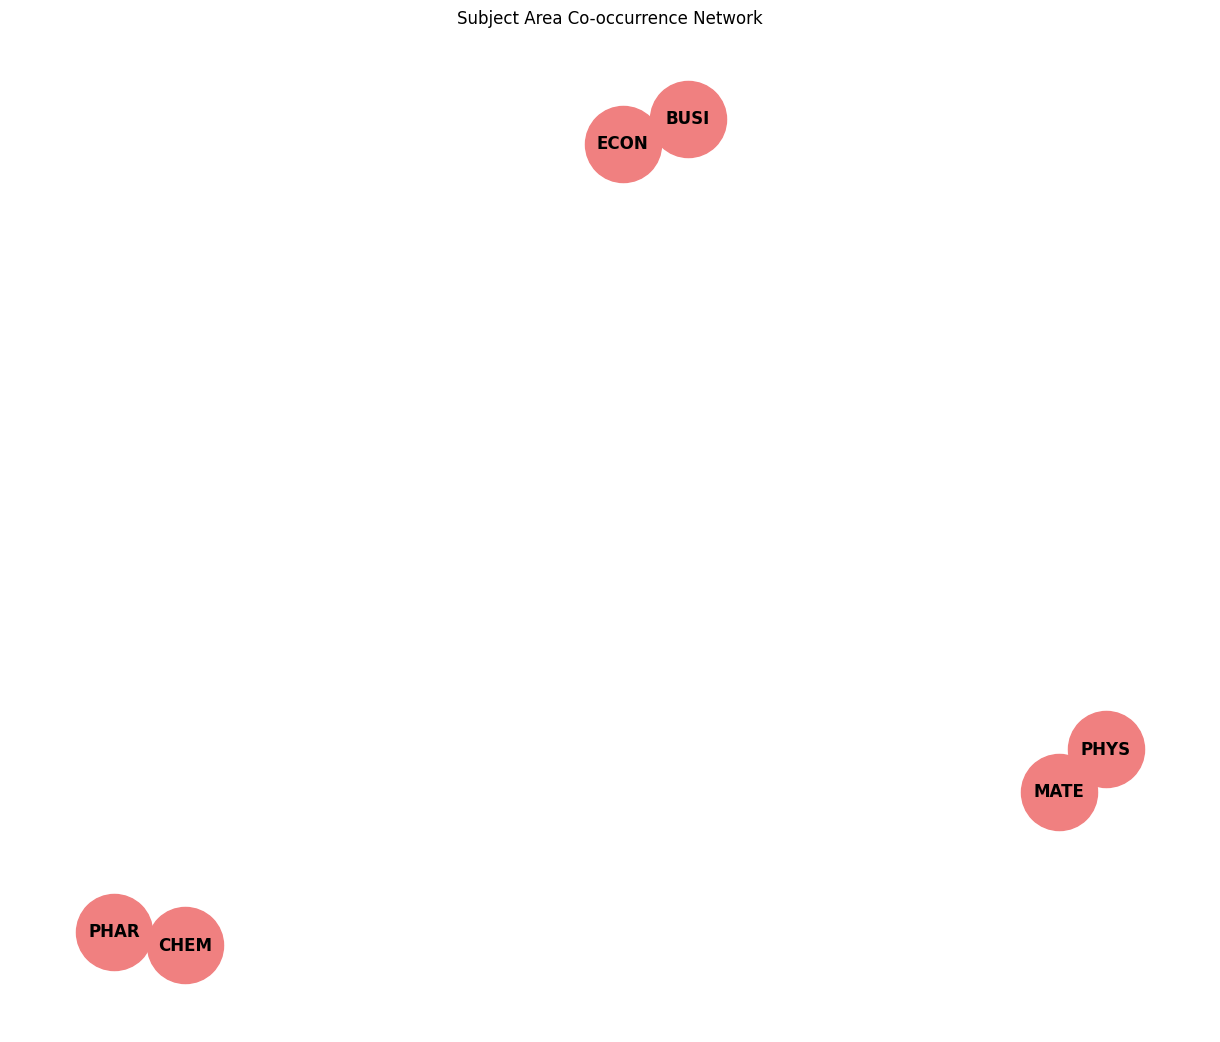

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Example data (replace with your actual dataset)
data = {
    'subjectArea': ['MATE,PHYS', 'BUSI,ECON', 'HEAL', 'PHAR,CHEM', 'MEDI'],
    'publication_date': ['01/10/2018', '01/01/2018', '01/12/2018', '01/01/2018', '01/06/2018'],
    'Top_Three_Keywords': [['alloys', 'corrosion', 'exhibit'], ['universities', 'creation', 'innovation'], 
                           ['hyperkyphosis', 'owd', 'thoracic'], ['farmlands', 'soils', 'conserved'], ['inch', 'cannulation', 'wire']],
    'One_keyword': ['alloys', 'universities', 'hyperkyphosis', 'farmlands', 'inch']
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Step 1: Initialize a graph
G = nx.Graph()

# Step 2: Create a dictionary to keep track of subject area co-occurrences
subject_area_keywords = defaultdict(set)

# Step 3: Populate the dictionary with subject areas and their associated keywords
for _, row in df.iterrows():
    subject_areas = row['subjectArea'].split(',')
    keywords = set(row['Top_Three_Keywords'] + [row['One_keyword']])
    
    for subject in subject_areas:
        subject_area_keywords[subject].update(keywords)

# Step 4: Compare each pair of subject areas to determine co-occurrence
for subject1, keywords1 in subject_area_keywords.items():
    for subject2, keywords2 in subject_area_keywords.items():
        if subject1 != subject2:
            # Calculate the number of shared keywords
            shared_keywords = keywords1.intersection(keywords2)
            if shared_keywords:
                # If there are shared keywords, add an edge with the weight representing the number of shared keywords
                if G.has_edge(subject1, subject2):
                    G[subject1][subject2]['weight'] += len(shared_keywords)
                else:
                    G.add_edge(subject1, subject2, weight=len(shared_keywords))

# Step 5: Plot the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)  # Positioning of nodes
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightcoral", font_size=12, font_weight="bold", edge_color='gray')

# Display edge weights (co-occurrence count)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the plot
plt.title('Subject Area Co-occurrence Network')
plt.show()


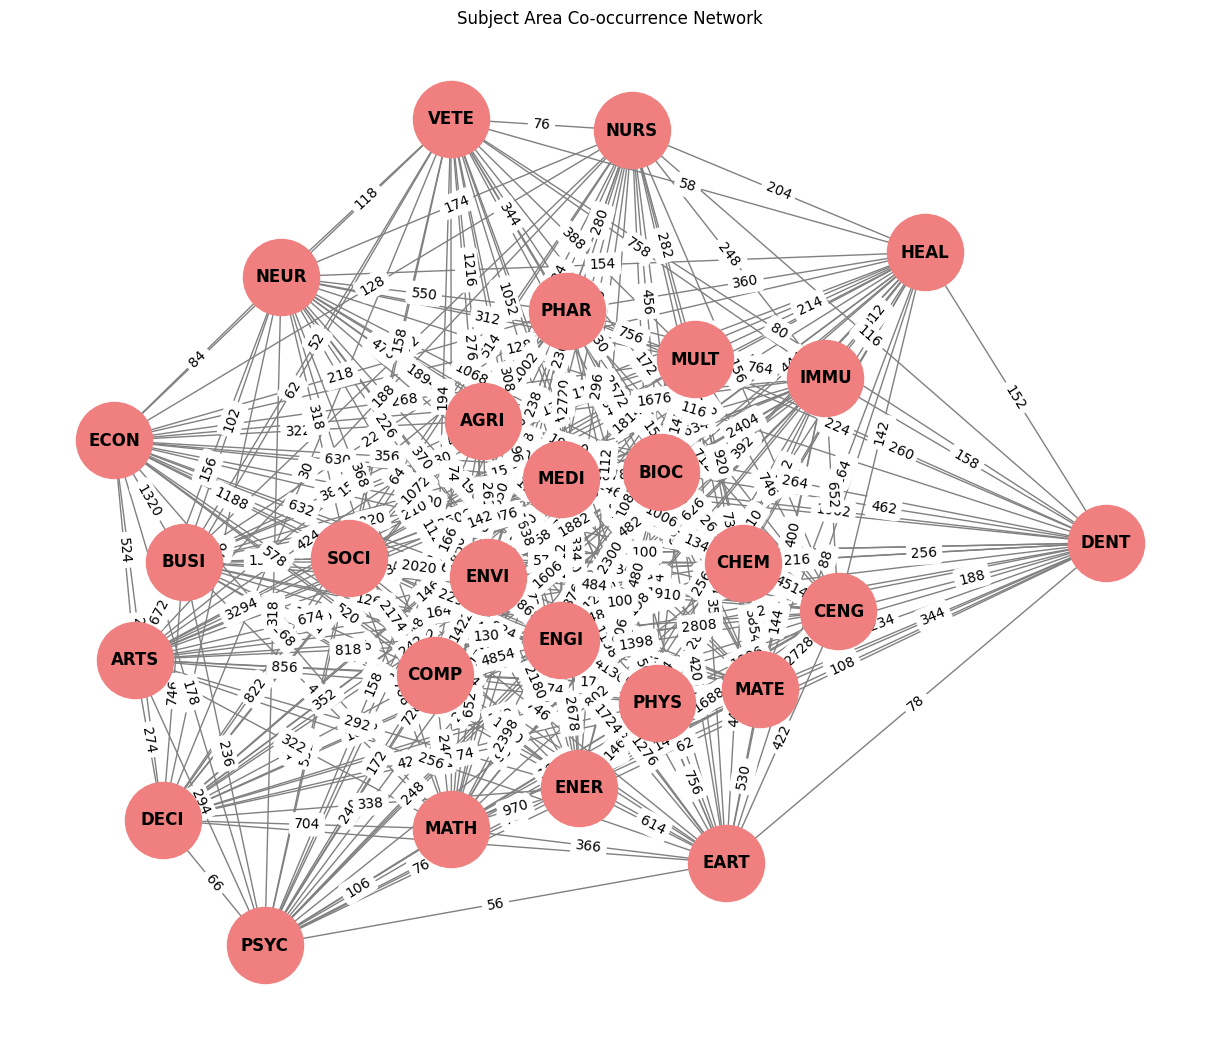

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict


df = pd.read_csv('merged_data_withkeywords.csv')


df['Top_Three_Keywords'] = df['Top_Three_Keywords'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
df['One_keyword'] = df['One_keyword'].apply(lambda x: [x] if isinstance(x, str) else [])

G = nx.Graph()


subject_area_keywords = defaultdict(set)

for _, row in df.iterrows():
    subject_areas = row['subjectArea'].split(',')  
    keywords = set(row['Top_Three_Keywords'] + row['One_keyword']) 

    for subject in subject_areas:
        subject_area_keywords[subject].update(keywords)


for subject1, keywords1 in subject_area_keywords.items():
    for subject2, keywords2 in subject_area_keywords.items():
        if subject1 != subject2:

            shared_keywords = keywords1.intersection(keywords2)
            if shared_keywords:
        
                if G.has_edge(subject1, subject2):
                    G[subject1][subject2]['weight'] += len(shared_keywords)
                else:
                    G.add_edge(subject1, subject2, weight=len(shared_keywords))

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=2, seed=42) 
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightcoral", font_size=12, font_weight="bold", edge_color='gray')


edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)


plt.title('Subject Area Co-occurrence Network')
plt.show()


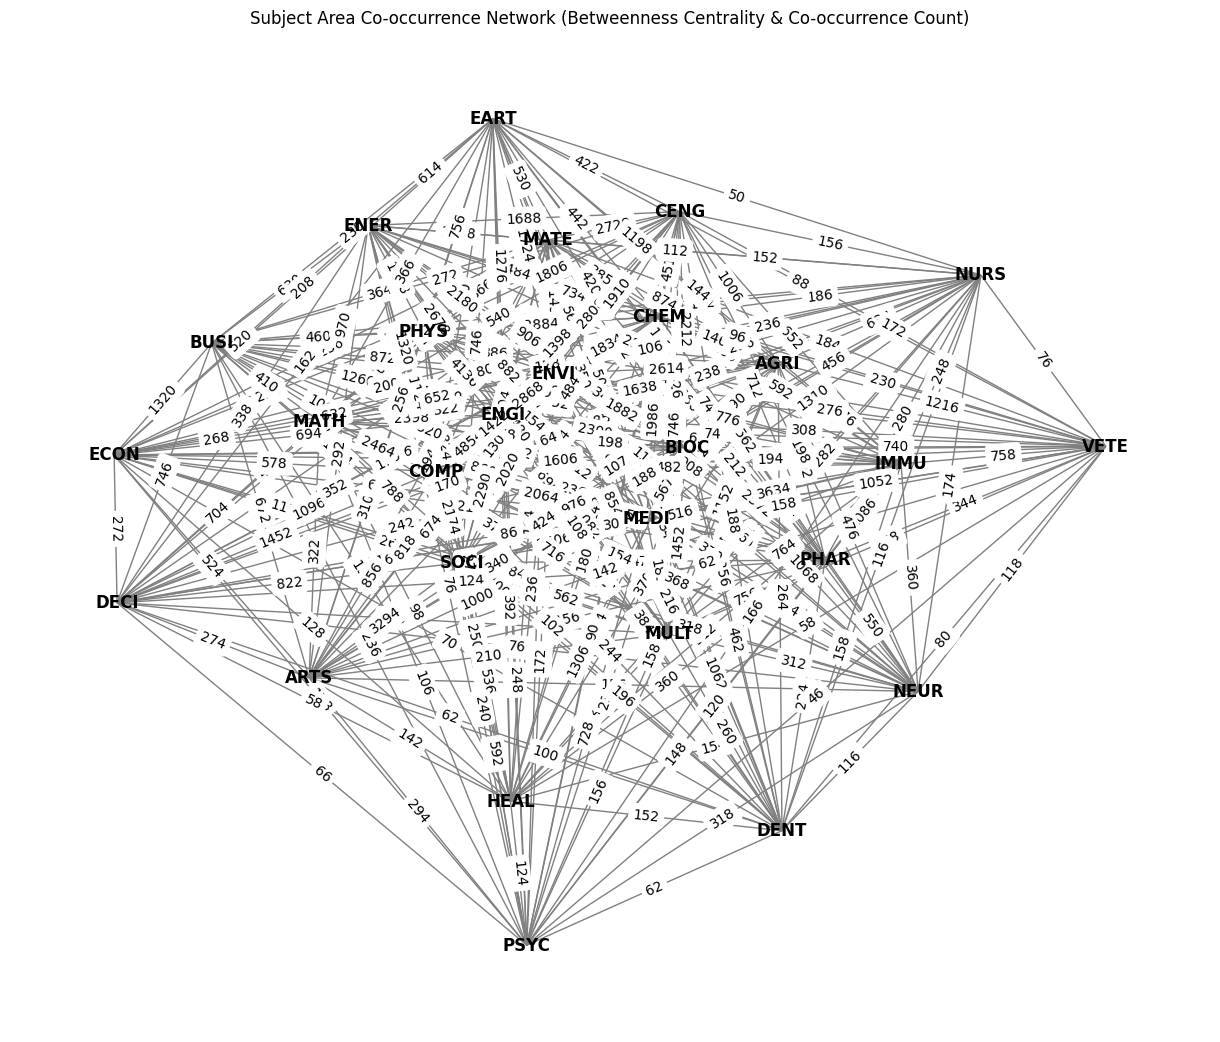

In [ ]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
import streamlit as st

# Mapping of abbreviations to full names
subject_area_mapping = {
    "MEDI": "Medicine", "ENGI": "Engineering", "CHEM": "Chemistry", "BUSI": "Business", 
    "BIOC": "Biochemistry", "DECI": "Decision Sciences", "MATE": "Materials Science", 
    "COMP": "Computer Science", "PHYS": "Physics", "ENVI": "Environmental Science", 
    "AGRI": "Agricultural Science", "ENER": "Energy", "SOCI": "Sociology", "VETE": "Veterinary Science", 
    "NEUR": "Neuroscience", "ECON": "Economics", "EART": "Earth Sciences", "MATH": "Mathematics", 
    "MULT": "Multidisciplinary", "IMMU": "Immunology", "PHAR": "Pharmacology", "DENT": "Dentistry", 
    "CENG": "Chemical Engineering", "NURS": "Nursing", "HEAL": "Health Sciences", "PSYC": "Psychology", 
    "ARTS": "Arts and Humanities"
}

# Load the data
df = pd.read_csv('merged_data.csv')

# Initialize the graph
G = nx.Graph()

# Process the subjectArea column to create edges based on co-occurrence
for subject_area_str in df['subjectArea']:
    # Split the subject areas in each row by comma and strip whitespace
    subject_areas = [abbr.strip() for abbr in subject_area_str.split(",")]

    # Ensure we only process abbreviations that exist in the mapping
    subject_area_full = [subject_area_mapping[abbr] for abbr in subject_areas if abbr in subject_area_mapping]
    
    # Create edges between all pairs of subject areas in each record
    for i, subject1 in enumerate(subject_area_full):
        for subject2 in subject_area_full[i+1:]:
            G.add_edge(subject1, subject2)

# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Create positions for nodes
pos = nx.spring_layout(G, seed=42)

# Streamlit app
st.title("Co-Occurrence of Subject Areas with Betweenness Centrality")

# Graph visualization
def plot_interactive_network(graph, positions, betweenness_centrality):
    edge_x = []
    edge_y = []
    for edge in graph.edges():
        x0, y0 = positions[edge[0]]
        x1, y1 = positions[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines'
    )

    # Node size based on betweenness centrality
    node_x = []
    node_y = []
    node_color = []
    node_text = []
    node_size = []  # Size of nodes based on betweenness centrality

    for node in graph.nodes():
        x, y = positions[node]
        node_x.append(x)
        node_y.append(y)
        node_color.append('skyblue')
        node_text.append(node)
        # Scale betweenness centrality for node size (multiply by 1000 for visibility)
        node_size.append(betweenness_centrality[node] * 1500)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        text=node_text,
        marker=dict(
            size=node_size,
            color=node_color,
            line_width=2
        )
    )

    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=0, l=0, r=0, t=40),
                        xaxis=dict(showgrid=False, zeroline=False),
                        yaxis=dict(showgrid=False, zeroline=False)
                    ))
    return fig

# Display the graph
fig = plot_interactive_network(G, pos, betweenness_centrality)
st.plotly_chart(fig)


In [ ]:
# Try color the nodes

import pandas as pd
import networkx as nx
import plotly.graph_objects as go
import streamlit as st

# Mapping of abbreviations to full names
subject_area_mapping = {
    "MEDI": "Medicine", "ENGI": "Engineering", "CHEM": "Chemistry", "BUSI": "Business", 
    "BIOC": "Biochemistry", "DECI": "Decision Sciences", "MATE": "Materials Science", 
    "COMP": "Computer Science", "PHYS": "Physics", "ENVI": "Environmental Science", 
    "AGRI": "Agricultural Science", "ENER": "Energy", "SOCI": "Sociology", "VETE": "Veterinary Science", 
    "NEUR": "Neuroscience", "ECON": "Economics", "EART": "Earth Sciences", "MATH": "Mathematics", 
    "MULT": "Multidisciplinary", "IMMU": "Immunology", "PHAR": "Pharmacology", "DENT": "Dentistry", 
    "CENG": "Chemical Engineering", "NURS": "Nursing", "HEAL": "Health Sciences", "PSYC": "Psychology", 
    "ARTS": "Arts and Humanities"
}

# Load the data
df = pd.read_csv('merged_data.csv')

# Initialize the graph
G = nx.Graph()

# Process the subjectArea column to create edges based on co-occurrence
for subject_area_str in df['subjectArea']:
    # Split the subject areas in each row by comma and strip whitespace
    subject_areas = [abbr.strip() for abbr in subject_area_str.split(",")]

    # Ensure we only process abbreviations that exist in the mapping
    subject_area_full = [subject_area_mapping[abbr] for abbr in subject_areas if abbr in subject_area_mapping]
    
    # Create edges between all pairs of subject areas in each record
    for i, subject1 in enumerate(subject_area_full):
        for subject2 in subject_area_full[i+1:]:
            G.add_edge(subject1, subject2)

# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Create positions for nodes
pos = nx.spring_layout(G, seed=42, weight=30)

# Streamlit app
st.title("Co-Occurrence of Subject Areas with Betweenness Centrality")

def plot_interactive_network(graph, positions, betweenness_centrality):
    # Define node colors
    node_colors = {node: f"rgb({int(i * 50) % 256}, {int(i * 100) % 256}, {int(i * 150) % 256})"
                   for i, node in enumerate(graph.nodes())}

    edge_traces = []  # List to store edge traces (each with a unique color)

    for edge in graph.edges():
        x0, y0 = positions[edge[0]]
        x1, y1 = positions[edge[1]]
        edge_color = node_colors[edge[0]]  # Assign color based on one of its connecting nodes

        # Create a trace for this edge
        edge_trace = go.Scatter(
            x=[x0, x1, None],
            y=[y0, y1, None],
            line=dict(width=1.5, color=edge_color),
            hoverinfo='none',
            mode='lines'
        )
        edge_traces.append(edge_trace)

    # Node size based on betweenness centrality
    node_x = []
    node_y = []
    node_color = []
    node_text = []
    node_size = []  # Size of nodes based on betweenness centrality

    for node in graph.nodes():
        x, y = positions[node]
        node_x.append(x)
        node_y.append(y)
        node_color.append(node_colors[node])
        node_text.append(node)
        # Scale betweenness centrality for node size (multiply by 1000 for visibility)
        node_size.append(betweenness_centrality[node] * 1000)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        text=node_text,
        marker=dict(
            size=node_size,
            color=node_color,
            line_width=2
        )
    )

    # Combine all traces
    fig = go.Figure(data=edge_traces + [node_trace],
                    layout=go.Layout(
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=0, l=0, r=0, t=40),
                        xaxis=dict(showgrid=False, zeroline=False),
                        yaxis=dict(showgrid=False, zeroline=False)
                    ))
    return fig


# Display the graph
fig = plot_interactive_network(G, pos, betweenness_centrality)
st.plotly_chart(fig)
